In [61]:
from astropy.table import Table, vstack
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [105]:
filepath = "/sps/lsst/users/tguillem/web/clusters/catalogs/DC2_photoz_flexzboost/v0/"
tiles = [5074, 5073, 5072, 5071, 5070, 5069, 5068, 5067, 5066, 5065, 4860, 4859, 4858, 4857, 4856, 4855, 4854, 4853, 4852, 4851, 4850, 
         4648, 4647, 4646, 4645, 4644, 4643, 4642, 4641, 4640, 4639, 4638, 4637, 4636, 4441, 4440, 4439, 4438, 4437, 4436, 4435, 4434,
         4433, 4432, 4431, 4430, 4429, 4236, 4235, 4234, 4233, 4232, 4231, 4230, 4229, 4228, 4227, 4226, 4225, 4224, 4035, 4034, 4033, 
         4032, 4031, 4030, 4029, 4028, 4027, 4026, 4025, 4024, 4023, 3837, 3836, 3835, 3834, 3833, 3832, 3831, 3830, 3829, 3828, 3827, 
         3826, 3825, 3643, 3642, 3641, 3640, 3639, 3638, 3637, 3636, 3635, 3634, 3633, 3632, 3631, 3453, 3452, 3451, 3450, 3449, 3448, 
         3447, 3446, 3445, 3444, 3443, 3442, 3441, 3268, 3267, 3266, 3265, 3264, 3263, 3262, 3261, 3260, 3259, 3258, 3257, 3256, 3086, 
         3085, 3084, 3083, 3082, 3081, 3080, 3079, 3078, 3077, 3076, 3075, 3074, 2908, 2907, 2906, 2905, 2904, 2903, 2902, 2901, 2900, 
         2899, 2898, 2897, 2896]

In [109]:
footDir = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/DC2/footprint/"

In [110]:
NSIDE = 4096
for tile in tiles:
    bigPix = tile
    print(bigPix)
    galaxies = Table.read(filepath + str(bigPix) + '/galaxies.fits')
    smallPixAll = hp.ang2pix(NSIDE, galaxies["ra"], galaxies["dec"], nest=False, lonlat=True)
    smallPix, indices, counts = np.unique(smallPixAll, return_index=True, return_inverse=False, return_counts=True)
    ra,dec = hp.pix2ang(NSIDE, smallPix, nest=False, lonlat=True)
    pixTable = Table()
    pixTable["pixel"] = smallPix
    pixTable["ra"] = ra
    pixTable["dec"] = dec
    pixTable["signal"] = 1
    footFile = footDir + str(bigPix) + ".fits"
    pixTable.write(footFile, overwrite=True)
    del pixTable, galaxies

5074
5073
5072
5071
5070
5069
5068
5067
5066
5065
4860
4859
4858
4857
4856
4855
4854
4853
4852
4851
4850
4648
4647
4646
4645
4644
4643
4642
4641
4640
4639
4638
4637
4636
4441
4440
4439
4438
4437
4436
4435
4434
4433
4432
4431
4430
4429
4236
4235
4234
4233
4232
4231
4230
4229
4228
4227
4226
4225
4224
4035
4034
4033
4032
4031
4030
4029
4028
4027
4026
4025
4024
4023
3837
3836
3835
3834
3833
3832
3831
3830
3829
3828
3827
3826
3825
3643
3642
3641
3640
3639
3638
3637
3636
3635
3634
3633
3632
3631
3453
3452
3451
3450
3449
3448
3447
3446
3445
3444
3443
3442
3441
3268
3267
3266
3265
3264
3263
3262
3261
3260
3259
3258
3257
3256
3086
3085
3084
3083
3082
3081
3080
3079
3078
3077
3076
3075
3074
2908
2907
2906
2905
2904
2903
2902
2901
2900
2899
2898
2897
2896


In [111]:
footFiles = glob.glob(footDir+"*")
footList = []
for f in footFiles:
    pixFits = fits.open(f)
    footList.append(Table(pixFits[1].data))

bigTable = vstack(footList)

In [112]:
bigTable

pixel,ra,dec,signal
int64,float64,float64,int64
161491316,53.173828125,-37.18060338169154,1
161491318,53.2177734375,-37.18060338169154,1
161491319,53.23974609375,-37.18060338169154,1
161491320,53.26171874999999,-37.18060338169154,1
161491321,53.28369140625,-37.18060338169154,1
161491322,53.30566406249999,-37.18060338169154,1
161491323,53.32763671875,-37.18060338169154,1
161491324,53.34960937499999,-37.18060338169154,1
161491325,53.37158203125,-37.18060338169154,1


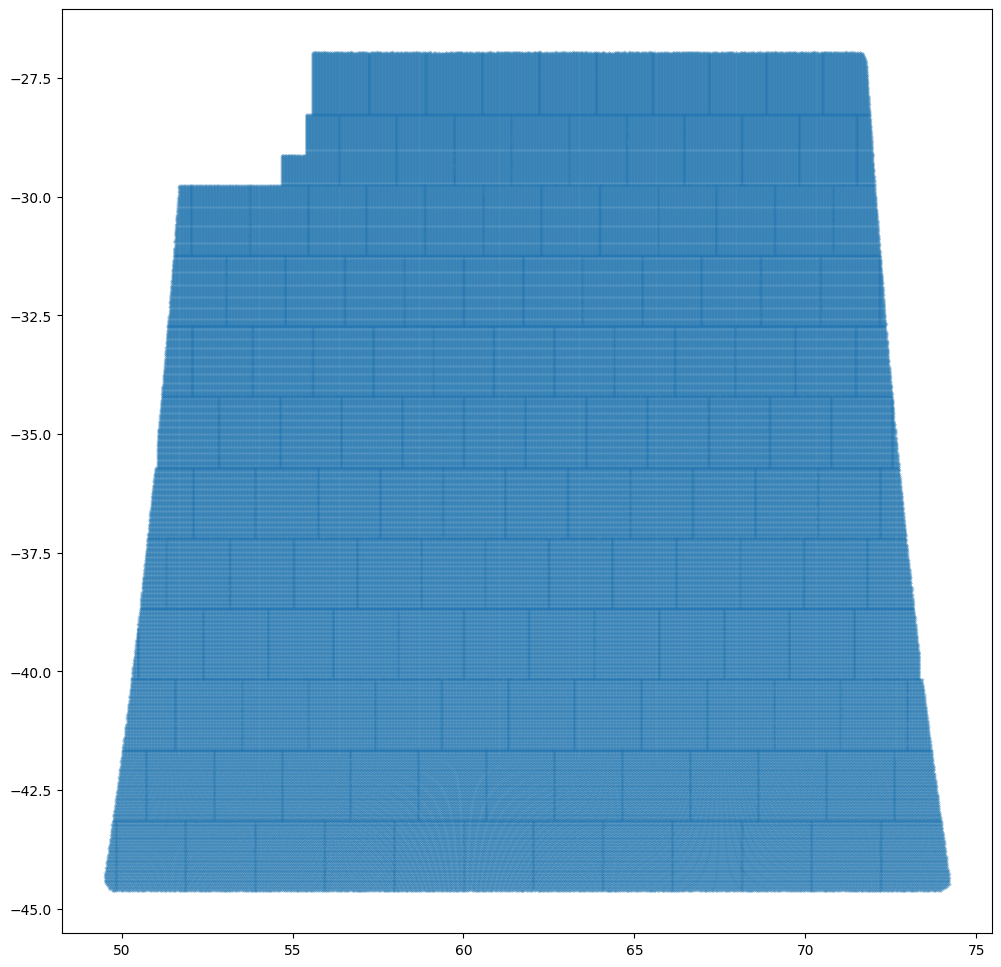

In [113]:
plt.figure(figsize=(12,12))
_ = plt.scatter(bigTable["ra"], bigTable["dec"], s=0.01)

In [114]:
intpath = "/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/cosmoDC2/m200c_gt_13.0/cosmoDC2_v1.1.4_image/"

In [115]:
cosmoDC2 = Table.read(intpath + "Catalog.fits")

In [118]:
cosmoDC2['healpix'] = hp.ang2pix(NSIDE, cosmoDC2["ra"], cosmoDC2["dec"], nest=False, lonlat=True) 

In [119]:
cosmoDC2['mask'] = 0

In [120]:
cosmoDC2

id,ra,dec,z,mass,log_mass,m200c,log_m200c,healpix,mask
int64,float64,float64,float64,float64,float64,float64,float64,int64,int64
1600020475,50.775875822529436,-27.112584328955446,0.04530489444732666,2.247e+13,13.351613892324458,18901145086557.746,13.276488115798056,146532614,0
2700020475,49.466814189348334,-25.960541211222015,0.04615640640258789,1.633e+13,13.2130360195722,15062094204754.93,13.177885359536557,144730315,0
17200020453,50.16585579512233,-25.259404686564693,0.08653247356414795,2.283e+13,13.358450109677962,20441971397588.734,13.310522776287003,143599851,0
19000020453,49.51865674267036,-26.131426039026245,0.09413313865661621,1.199e+13,13.078863522811979,10668658238016.902,13.028109803073287,144992461,0
19800020453,50.691634217578326,-26.88681304144144,0.08739697933197021,8.412e+13,13.924887877935069,71624983358738.03,13.855064534072003,146188547,0
32800020453,51.49405530538187,-26.309071814426567,0.08795535564422607,1.328e+13,13.123179943904667,10371945197971.832,13.015860213430779,145271080,0
2000020442,51.03054382968504,-25.767733992572435,0.10751283168792725,3.555e+13,13.550864347552649,31256384653340.848,13.494938742848014,144419090,0
32300020442,51.48013416475692,-25.825311694587846,0.10751473903656006,1.339e+13,13.126824099732831,11587427913554.93,13.063987045375406,144517415,0
33300020442,50.315518939516316,-26.69559169836869,0.108817458152771,3.434e+13,13.53575955305564,29876928281239.438,13.475335944579681,145893618,0


In [130]:
per_list = [i for i in range(10,100,10)]
percent = []

In [146]:
for i, halo in enumerate(cosmoDC2):
    if halo['healpix'] in bigTable["pixel"]:
        halo["mask"] = 1
    per = int(i/len(cosmoDC2['id'])*100)
    if per in per_list and per not in percent:
        print(per)
        percent.append(per)

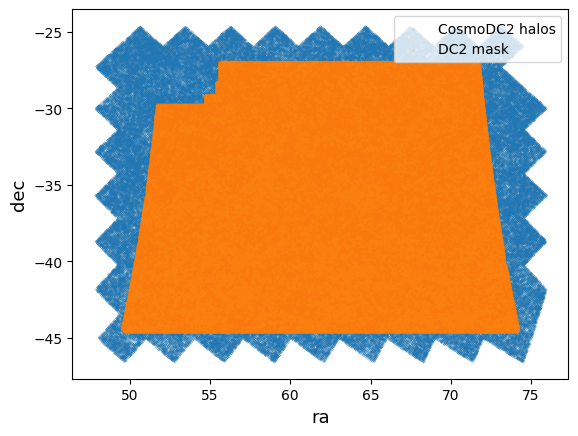

In [161]:
plt.scatter(cosmoDC2['ra'], cosmoDC2['dec'], s = 0.01, label = "CosmoDC2 halos")
plt.scatter(bigTable["ra"], bigTable["dec"], s=0.01, label = "DC2 mask")
plt.xlabel("ra", fontsize = 13)
plt.ylabel("dec", fontsize = 13)
plt.legend()

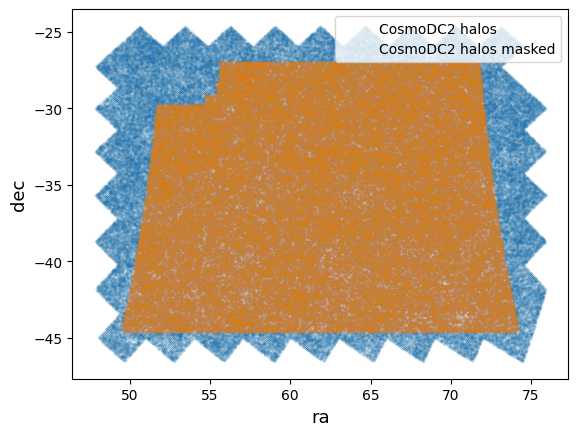

In [160]:
plt.scatter(cosmoDC2['ra'], cosmoDC2['dec'], s = 0.01, alpha = .5, label = "CosmoDC2 halos")
plt.scatter(cosmoDC2[cosmoDC2['mask']==1]['ra'], cosmoDC2[cosmoDC2['mask']==1]['dec'], s = 0.01, alpha = .5, label = "CosmoDC2 halos masked")
plt.xlabel("ra", fontsize = 13)
plt.ylabel("dec", fontsize = 13)
plt.legend()

In [168]:
outpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/DC2/halos/"
cosmoDC2_masked = cosmoDC2[cosmoDC2['mask']==1]

In [169]:
cosmoDC2_masked.remove_columns(['healpix', 'mask'])

In [170]:
cosmoDC2_masked.write(outpath + 'Catalog.fits')